# Chapter06 SVM

Support vector machine (SVM) 是一种通过找到数据中的超平面 (hyperplane) 以实现分类的监督式学习方法。

> https://easyai.tech/ai-definition/svm/

超平面是分割输入变量空间的线。在SVM中，选择超平面以最佳地将输入变量空间中的点与它们的类（0级或1级）分开。在二维中，您可以将其视为一条线，并假设我们的所有输入点都可以被这条线完全分开。SVM学习算法找到导致超平面最好地分离类的系数。

> 超平面：分类的决策边界，分布在超平面一侧的数据属于一个类别，而分布在另一侧的数据属于另一个类别。超平面具有N-1的维度，例如对二维数据的超平面是一维的线；三维数据的超平面是二维的面。
> 
> 支持向量 (support vector) 是离分隔超平面最近的点。

![](https://pic2.zhimg.com/v2-f9e1e7fd08460a5fab044c71ed8b0bb1_r.jpg)

从直觉上来说，为了更好的分类效果，我们希望超平面离两端的数据点都足够远。自然地，最大化两侧数据点到超平面的距离是一种寻找最优超平面的方法。事实上，在SVM中我们只需要最大化支持向量到分隔超平面的距离即可。

首先，超平面的形式可以写为 ${w^Tx+b}$。而点A到超平面的距离为：${|w^Tx+b|/||w||}$

> wx+b=1, wx+b=-1以及wx+b=0可以表示任意的三个相邻距离相等的hyperplane。SVM本质就是在找这三个hyperplane对应的w和b
> ![](https://pic1.zhimg.com/80/v2-bfc8c57f522ce521994035859fcb388c_1440w.jpg)

间隔最大化

${max_{w,b}\lbrace min_n(label \cdot (w^Tx+b)) \cdot \frac{1}{||x||} \rbrace}$

应用拉格朗日乘子法，将上述问题转化为其对偶问题（？），最后的目标优化函数为：

${max_{a}[\sum^m_{i=1} \alpha - \frac{1}{2} \sum^m_{i,j=1} label^i \cdot label^j \cdot \alpha _i \alpha _j x_i*x_j]}$

其约束条件为：

${C \geqq \alpha \geqq 0, and \sum^m_{i=1} \alpha_i \cdot label^i = 0}$

SVM的主要工作是求解alpha

## SVM的一般流程
1. 收集数据：任意方法
2. 准备数据：数值型数据
3. 分析数据：有助于可视化超平面
4. 训练算法：SVM的大部分运行时间都源自训练，该过程主要实现两个参数的调优
5. 测试算法：计算
6. 使用算法：几乎所有分类问题都可以用SVM，但SVM本身是一个二元分类器，对多类问题应用SVM需要有所调整

## SMO算法

序列最小优化 (Sequential minimal otimization, SMO) 是一种训练SVM的方法。SMO算法的目标是求出一系列alpha和b，进而计算出权重向量w，得到超平面。

SMO的工作原理是：每次循环选择两个alpha进行优化，增大其中一个同时减小另一个。这两个alpha需要符合两个条件：
- 两个alpha必须在间隔边界之外
- 两个alpha没经过区间化处理或不在边界上。


使用示例数据 `testSet.txt` 演示简化的SMO算法。数据包含100个样本点，其中，前两列为特征值，最后一列是标签。

![](img/img1.png)


首先，使用 `loadDataSet()` 读入数据


In [44]:
import svmMLiA
dataArr, labelArr = svmMLiA.loadDataSet('testSet.txt')
dataArr[0:3]

[[3.542485, 1.977398], [3.018896, 2.556416], [7.55151, -1.58003]]

In [5]:
labelArr[0:3]

[-1.0, -1.0, 1.0]

自定义函数 `plotScatter` 可视化数据

```python
def plotScatter(datArrIn, labelArrIn):
    import matplotlib.pyplot as plt
    dataArr = mat(datArrIn)
    labelMat = array(labelArrIn)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,0]); ycord1.append(dataArr[i,1])
        else:
            xcord2.append(dataArr[i,0]); ycord2.append(dataArr[i,1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

```


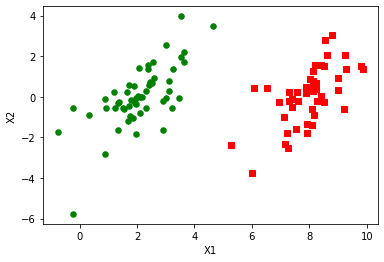

In [46]:
from importlib import reload
reload(svmMLiA)
svmMLiA.plotScatter(dataArr, labelArr)

In [6]:
b, alphas = svmMLiA.smoSimple(dataMatIn=dataArr, classLabels=labelArr, C=0.6, toler=0.001, maxIter=40)

iter: 0 i:0, pairs changed 1
L==H
iter: 0 i:4, pairs changed 2
L==H
iter: 0 i:8, pairs changed 3
L==H
j not moving enough
j not moving enough
iter: 0 i:55, pairs changed 4
j not moving enough
iter: 0 i:72, pairs changed 5
L==H
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
L==H
iter: 0 i:55, pairs changed 1
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:17, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:55, pairs changed 1
j not moving enough
iteration number: 0
j not moving enough
iter: 0 i:4, 

j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 4 i:54, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 4 i:76, pairs changed 2
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not movi

j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not

iteration number: 3
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
iter: 4 i:17, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 2 i:55, pairs changed 1
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration numbe

j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
j not moving enough
j not moving enough
iteration number: 10
j not moving enough
j not moving enough
j not moving enough
iteration number: 11
j not moving enough
j not moving enough
j not moving enough
iteration number: 12
j not moving enough
j not moving enough
j not moving enough
iteration number: 13
j not moving enough
j not moving enough
j not moving enough
iteration number: 14
j not moving enough
j not moving enough
j not moving enough
iteration number: 15
j not moving enough
j not moving enough
j not moving enough
iteration number: 16
j not moving enough
j not moving enough
j not moving enough
iteration number: 17
j not moving enough
j not moving enough
j not moving

j not moving enough
j not moving enough
iteration number: 11
j not moving enough
j not moving enough
iteration number: 12
j not moving enough
j not moving enough
iteration number: 13
j not moving enough
j not moving enough
iteration number: 14
j not moving enough
j not moving enough
iteration number: 15
j not moving enough
j not moving enough
iteration number: 16
j not moving enough
j not moving enough
iteration number: 17
j not moving enough
j not moving enough
iteration number: 18
j not moving enough
j not moving enough
iteration number: 19
j not moving enough
j not moving enough
iteration number: 20
j not moving enough
j not moving enough
iteration number: 21
j not moving enough
j not moving enough
iteration number: 22
j not moving enough
j not moving enough
iteration number: 23
j not moving enough
j not moving enough
iteration number: 24
j not moving enough
j not moving enough
iteration number: 25
j not moving enough
j not moving enough
iteration number: 26
j not moving enough
j no

In [7]:
b

matrix([[-3.80346112]])

In [8]:
alphas[alphas>0]

matrix([[0.12782956, 0.23903096, 0.36686052]])

`smoSimple(dataMatIn, classLabels, C, toler, maxIter)` 包括5个参数：
- `dataMatIn`: input data matrix
- `classLabels`: vector of classification labels
- `C`: constant, the upper limit of alphas
- `toler`: error tolerance 
- `maxIter`: the times of maximum iteration 

分段理解 `smoSimple` 函数

首先初始化数据,例如,设`b=0`, 矩阵维度`m,n`，设 `alphas=mat(zeros((m,1)))` 为 `m*1` 的零矩阵， 设循环计数变量 `iter=0` 

```python
    dataMatrix = mat(dataMatIn); labelMat = mat(classLabels).transpose()
    b = 0; m,n = shape(dataMatrix)
    alphas = mat(zeros((m,1))) # tuple: (m,1) 
    iter = 0
```

在外部循环，记录alpha对是否被改变
```python
    while (iter < maxIter):
        alphaPairsChanged = 0
```
内部循环遍历所有数据点
```python
         for i in range(m):
            # `(dataMatrix*dataMatrix[i,:].T)`： `m*2`矩阵与`2*1`矩阵相乘，得到`m*1`的矩阵
            fXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b # `.T` == `.transpose()`
            Ei = fXi - float(labelMat[i])#if checks if an example violates KKT conditions
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                j = selectJrand(i,m)
                fXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();

```
`fXi`计算当前点的预测分类，并计算预测值与真实值 `float(labelMat[i])` 的误差 `Ei` . 如果误差值很大，则对alpha进行优化。如果alpha开始优化，首先会使用 `selectJrand()` 随机选择一个点j (second alpha)，计算其预测分类值 `fXj` 和误差 `Ej`.

随后，计算`L`和`H`用于调整`alpha[j]`处于0-C之间，如果 `L==H`，执行 `continue` 跳出这次内部循环，执行下一次循环
```python
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print("L==H"); continue
```
计算对alpha的最优修改量 
`eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T` 

随后，对alpha值进行修改，`alpha[j]`和`alpha[i]`偏移量相等但符号相反。如果`alpha[j]`偏移量太小也会退出循环，重新计算
```python
                if eta >= 0: print("eta>=0"); continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print("j not moving enough"); continue
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])#update i by the same amount as j
                                                        #the update is in the oppostie direction
```

最后，计算常数项`b`
```python
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print("iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print("iteration number: %d" % iter)
    return b,alphas
```
通过上面的运行，我们可以发现该函数返回一个常数项`b`的矩阵，和`alpha` 矩阵


运行完整版的SMO算法

In [31]:
reload(svmMLiA)
dataArr, labelArr = svmMLiA.loadDataSet('testSet.txt')
b, alphas = svmMLiA.smoP(dataArr, labelArr, 0.6, 0.001, 40)

L==H
fullSet, iter: 0 i:0, pairs changed 0
L==H
fullSet, iter: 0 i:1, pairs changed 0
fullSet, iter: 0 i:2, pairs changed 1
L==H
fullSet, iter: 0 i:3, pairs changed 1
fullSet, iter: 0 i:4, pairs changed 2
fullSet, iter: 0 i:5, pairs changed 2
fullSet, iter: 0 i:6, pairs changed 2
j not moving enough
fullSet, iter: 0 i:7, pairs changed 2
L==H
fullSet, iter: 0 i:8, pairs changed 2
fullSet, iter: 0 i:9, pairs changed 2
L==H
fullSet, iter: 0 i:10, pairs changed 2
L==H
fullSet, iter: 0 i:11, pairs changed 2
L==H
fullSet, iter: 0 i:12, pairs changed 2
fullSet, iter: 0 i:13, pairs changed 2
L==H
fullSet, iter: 0 i:14, pairs changed 2
fullSet, iter: 0 i:15, pairs changed 2
fullSet, iter: 0 i:16, pairs changed 2
L==H
fullSet, iter: 0 i:17, pairs changed 2
fullSet, iter: 0 i:18, pairs changed 3
fullSet, iter: 0 i:19, pairs changed 3
fullSet, iter: 0 i:20, pairs changed 3
fullSet, iter: 0 i:21, pairs changed 3
j not moving enough
fullSet, iter: 0 i:22, pairs changed 3
L==H
fullSet, iter: 0 i:23, 

根据alpha计算权重向量w

${w=\sum^{n}_{i=1} \alpha * label^{i} * x_i}$

In [32]:
ws = svmMLiA.calcWs(alphas, dataArr, labelArr)
ws

array([[ 0.65307162],
       [-0.17196128]])

对第一个数据点进行分类

In [33]:
datMat = mat(dataArr)
datMat[0] * mat(ws) + b

matrix([[-0.92555695]])

如果这个值大于0，那它就属于1类；反之，则属于-1类。现在检查第一个数据点的标签，观察分类是否准确

In [34]:
labelArr[0]

-1.0

结果表明我们的SVM分类器能够成功地在训练数据集上分类，分类器训练成功。

上述是线性可分的情况，假如数据是线性不可分的，又该如何应对？

一个可行的方法是应用核函数（kernel）。下面介绍其中的一种，径向基函数（radial basis function）。

如果一个复杂数据在低维空间线性不可分，我们可以将其映射到高维空间解决线性问题（两个问题等价）。
![](img/img2.png)

> 映射：数据从一个特征空间转换到另一个特征空间

核函数所做的就是这种数据映射的事情。

径向基函数的一个高斯版本：
${k(x,y)=exp(\frac{-||x-y||^2}{2\sigma ^2})}$

其中，${\sigma}$ 是用户定义的用于确定到达率（reach）或函数值跌落到0的**速度参数**

修改SMO算法适应核函数，使用 `testRbf` 函数测试核函数版SVM的分类效果


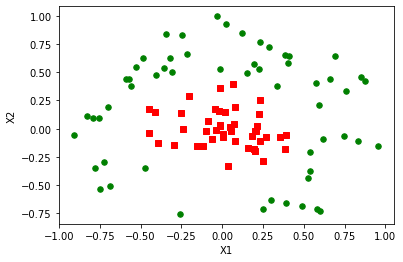

In [48]:
dataArrRbf,labelArrRbf = svmMLiA.loadDataSet('testSetRBF.txt')
svmMLiA.plotScatter(dataArrRbf, labelArrRbf)

In [49]:
svmMLiA.testRbf(k1=1.3)

fullSet, iter: 0 i:0, pairs changed 1
fullSet, iter: 0 i:1, pairs changed 2
fullSet, iter: 0 i:2, pairs changed 3
fullSet, iter: 0 i:3, pairs changed 4
fullSet, iter: 0 i:4, pairs changed 4
fullSet, iter: 0 i:5, pairs changed 5
fullSet, iter: 0 i:6, pairs changed 6
fullSet, iter: 0 i:7, pairs changed 6
fullSet, iter: 0 i:8, pairs changed 7
fullSet, iter: 0 i:9, pairs changed 7
fullSet, iter: 0 i:10, pairs changed 8
fullSet, iter: 0 i:11, pairs changed 9
fullSet, iter: 0 i:12, pairs changed 10
fullSet, iter: 0 i:13, pairs changed 11
fullSet, iter: 0 i:14, pairs changed 12
fullSet, iter: 0 i:15, pairs changed 13
fullSet, iter: 0 i:16, pairs changed 14
fullSet, iter: 0 i:17, pairs changed 15
fullSet, iter: 0 i:18, pairs changed 16
j not moving enough
fullSet, iter: 0 i:19, pairs changed 16
fullSet, iter: 0 i:20, pairs changed 16
L==H
fullSet, iter: 0 i:21, pairs changed 16
fullSet, iter: 0 i:22, pairs changed 16
fullSet, iter: 0 i:23, pairs changed 17
fullSet, iter: 0 i:24, pairs changed 

不同sigma (函数的参数k)返回的训练错误率、测试错误率和支持向量个数都会不一样。


# 示例：基于SVM的手写识别

由于kNN方法建立的分类器所占内存太大，我们尝试用SVM解决这个问题



In [51]:
svmMLiA.testDigits(('rbf', 10))

fullSet, iter: 0 i:0, pairs changed 1
fullSet, iter: 0 i:1, pairs changed 2
fullSet, iter: 0 i:2, pairs changed 3
fullSet, iter: 0 i:3, pairs changed 4
fullSet, iter: 0 i:4, pairs changed 5
fullSet, iter: 0 i:5, pairs changed 6
fullSet, iter: 0 i:6, pairs changed 7
fullSet, iter: 0 i:7, pairs changed 8
fullSet, iter: 0 i:8, pairs changed 9
fullSet, iter: 0 i:9, pairs changed 10
fullSet, iter: 0 i:10, pairs changed 11
fullSet, iter: 0 i:11, pairs changed 11
fullSet, iter: 0 i:12, pairs changed 12
fullSet, iter: 0 i:13, pairs changed 13
fullSet, iter: 0 i:14, pairs changed 14
fullSet, iter: 0 i:15, pairs changed 15
fullSet, iter: 0 i:16, pairs changed 16
fullSet, iter: 0 i:17, pairs changed 17
fullSet, iter: 0 i:18, pairs changed 18
fullSet, iter: 0 i:19, pairs changed 19
fullSet, iter: 0 i:20, pairs changed 20
fullSet, iter: 0 i:21, pairs changed 21
fullSet, iter: 0 i:22, pairs changed 22
fullSet, iter: 0 i:23, pairs changed 23
fullSet, iter: 0 i:24, pairs changed 24
fullSet, iter: 0 i:

fullSet, iter: 0 i:270, pairs changed 82
fullSet, iter: 0 i:271, pairs changed 83
j not moving enough
fullSet, iter: 0 i:272, pairs changed 83
fullSet, iter: 0 i:273, pairs changed 83
j not moving enough
fullSet, iter: 0 i:274, pairs changed 83
j not moving enough
fullSet, iter: 0 i:275, pairs changed 83
fullSet, iter: 0 i:276, pairs changed 84
fullSet, iter: 0 i:277, pairs changed 85
fullSet, iter: 0 i:278, pairs changed 86
j not moving enough
fullSet, iter: 0 i:279, pairs changed 86
fullSet, iter: 0 i:280, pairs changed 86
fullSet, iter: 0 i:281, pairs changed 87
L==H
fullSet, iter: 0 i:282, pairs changed 87
fullSet, iter: 0 i:283, pairs changed 87
L==H
fullSet, iter: 0 i:284, pairs changed 87
L==H
fullSet, iter: 0 i:285, pairs changed 87
fullSet, iter: 0 i:286, pairs changed 88
L==H
fullSet, iter: 0 i:287, pairs changed 88
fullSet, iter: 0 i:288, pairs changed 88
L==H
fullSet, iter: 0 i:289, pairs changed 88
L==H
fullSet, iter: 0 i:290, pairs changed 88
L==H
fullSet, iter: 0 i:291, 

j not moving enough
non-bound, iter: 1 i:252, pairs changed 17
j not moving enough
non-bound, iter: 1 i:253, pairs changed 17
j not moving enough
non-bound, iter: 1 i:254, pairs changed 17
j not moving enough
non-bound, iter: 1 i:256, pairs changed 17
j not moving enough
non-bound, iter: 1 i:257, pairs changed 17
j not moving enough
non-bound, iter: 1 i:258, pairs changed 17
j not moving enough
non-bound, iter: 1 i:259, pairs changed 17
j not moving enough
non-bound, iter: 1 i:260, pairs changed 17
j not moving enough
non-bound, iter: 1 i:262, pairs changed 17
j not moving enough
non-bound, iter: 1 i:266, pairs changed 17
j not moving enough
non-bound, iter: 1 i:268, pairs changed 17
j not moving enough
non-bound, iter: 1 i:270, pairs changed 17
j not moving enough
non-bound, iter: 1 i:271, pairs changed 17
j not moving enough
non-bound, iter: 1 i:276, pairs changed 17
j not moving enough
non-bound, iter: 1 i:277, pairs changed 17
j not moving enough
non-bound, iter: 1 i:278, pairs cha

j not moving enough
fullSet, iter: 3 i:52, pairs changed 0
j not moving enough
fullSet, iter: 3 i:53, pairs changed 0
j not moving enough
fullSet, iter: 3 i:54, pairs changed 0
j not moving enough
fullSet, iter: 3 i:55, pairs changed 0
j not moving enough
fullSet, iter: 3 i:56, pairs changed 0
j not moving enough
fullSet, iter: 3 i:57, pairs changed 0
fullSet, iter: 3 i:58, pairs changed 0
fullSet, iter: 3 i:59, pairs changed 0
j not moving enough
fullSet, iter: 3 i:60, pairs changed 0
fullSet, iter: 3 i:61, pairs changed 0
fullSet, iter: 3 i:62, pairs changed 0
j not moving enough
fullSet, iter: 3 i:63, pairs changed 0
L==H
fullSet, iter: 3 i:64, pairs changed 0
L==H
fullSet, iter: 3 i:65, pairs changed 0
L==H
fullSet, iter: 3 i:66, pairs changed 0
j not moving enough
fullSet, iter: 3 i:67, pairs changed 0
j not moving enough
fullSet, iter: 3 i:68, pairs changed 0
fullSet, iter: 3 i:69, pairs changed 0
fullSet, iter: 3 i:70, pairs changed 0
fullSet, iter: 3 i:71, pairs changed 0
j not

j not moving enough
fullSet, iter: 3 i:216, pairs changed 0
fullSet, iter: 3 i:217, pairs changed 0
j not moving enough
fullSet, iter: 3 i:218, pairs changed 0
fullSet, iter: 3 i:219, pairs changed 0
fullSet, iter: 3 i:220, pairs changed 0
fullSet, iter: 3 i:221, pairs changed 0
j not moving enough
fullSet, iter: 3 i:222, pairs changed 0
fullSet, iter: 3 i:223, pairs changed 0
fullSet, iter: 3 i:224, pairs changed 0
fullSet, iter: 3 i:225, pairs changed 0
j not moving enough
fullSet, iter: 3 i:226, pairs changed 0
fullSet, iter: 3 i:227, pairs changed 0
fullSet, iter: 3 i:228, pairs changed 0
fullSet, iter: 3 i:229, pairs changed 0
fullSet, iter: 3 i:230, pairs changed 0
fullSet, iter: 3 i:231, pairs changed 0
j not moving enough
fullSet, iter: 3 i:232, pairs changed 0
j not moving enough
fullSet, iter: 3 i:233, pairs changed 0
j not moving enough
fullSet, iter: 3 i:234, pairs changed 0
j not moving enough
fullSet, iter: 3 i:235, pairs changed 0
j not moving enough
fullSet, iter: 3 i:2

the training error rate is: 0.000000
the test error rate is: 0.005376


# 小结

>  https://zhuanlan.zhihu.com/p/49331510

支持向量机的优点是:

- 由于SVM是一个凸优化问题，所以求得的解一定是全局最优而不是局部最优。
- 不仅适用于线性线性问题还适用于非线性问题(用核技巧)。
- 拥有高维样本空间的数据也能用SVM，这是因为数据集的复杂度只取决于支持向量而不是数据集的维度，这在某种意义上避免了“维数灾难”。
- 理论基础比较完善(例如神经网络就更像一个黑盒子)。

支持向量机的缺点是:

- 二次规划问题求解将涉及m阶矩阵的计算(m为样本的个数), 因此SVM不适用于超大数据集。(SMO算法可以缓解这个问题)
- 只适用于二分类问题。(SVM的推广SVR也适用于回归问题；可以通过多个SVM的组合来解决多分类问题)
